In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [3]:
#getting the dataset
train_data=torchvision.datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform=None)
test_data=torchvision.datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor(),target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 10321881.51it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 172865.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3215448.06it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20603317.74it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
#see first training example
image,label=train_data[0]

In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
print(f"Image shape: {image.shape} ->(color channels,height,width)")
print(f"Image label: {class_names[label]} ")

Image shape: torch.Size([1, 28, 28]) ->(color channels,height,width)
Image label: Ankle boot 


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

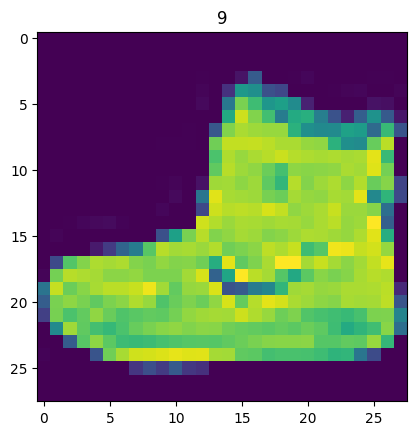

In [9]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

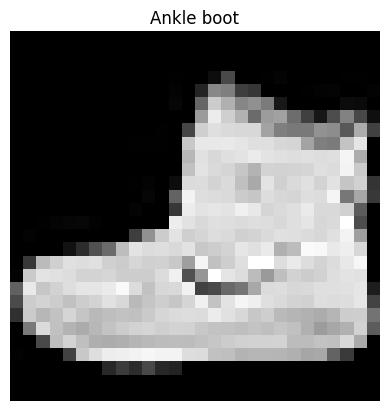

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

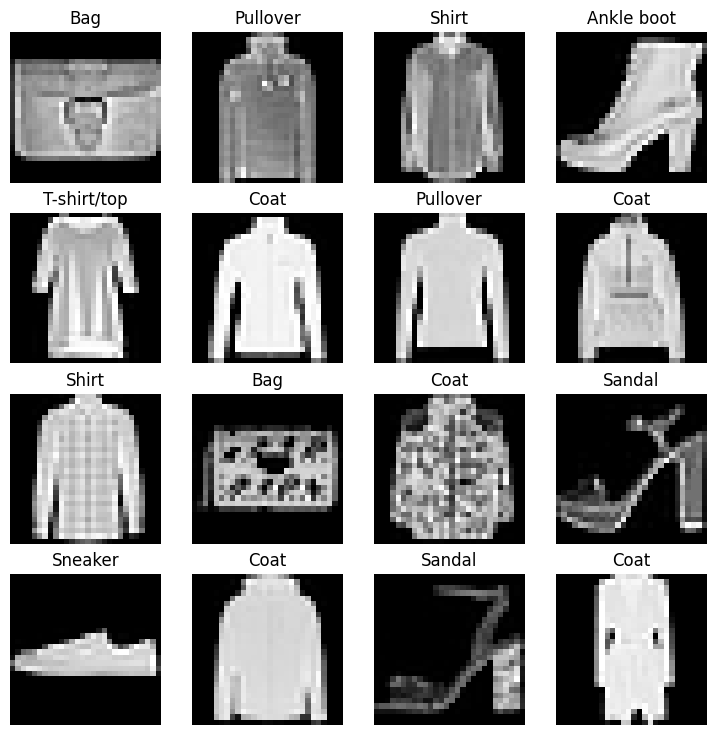

In [11]:
#plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(1,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
#prepare data loaders
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c17f7035960>,
 <torch.utils.data.dataloader.DataLoader at 0x7c17f7016c50>)

In [14]:
print(f"DataLoader: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7c17f7035960>, <torch.utils.data.dataloader.DataLoader object at 0x7c17f7016c50>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [15]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

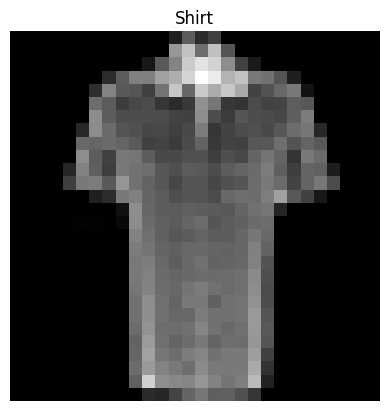

In [16]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [17]:
#model 0:Baseline Model
#create a flatten alyer
flatten_model=nn.Flatten()

#get a single sample
x=train_features_batch[0]
output=flatten_model(x)
x.shape,output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [18]:
from torch import nn
class FashionMNistModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_0=FashionMNistModelV0(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
model_0.to("cpu")

model_0

FashionMNistModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [23]:
from helper_functions import accuracy_fn

In [24]:
#setup loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [25]:
#creating a function to time our experiments
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [26]:
start_time=timer()
#some code...
end_time=timer()
print_train_time(start_time,end_time,"cpu")

Train time on cpu : 0.000 seconds


5.7611999977780215e-05

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    # Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch,(X, y) in enumerate(train_dataloader):
        model_0.train()
        #1.Forward pass
        y_pred = model_0(X)

        #2.Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        #3.Optimizer zero grad
        optimizer.zero_grad()

        #4.Loss backward
        loss.backward()

        #5.Optimizer step
        optimizer.step()

        # Print out
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    #testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu : 31.245 seconds


In [28]:
#setup device agnostic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [29]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [30]:
model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [31]:
#Model 1 using non linearity
class FashionMNistModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [32]:
torch.manual_seed(42)
model_1=FashionMNistModelV1(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
model_1.to(device)
model_1

FashionMNistModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [33]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [34]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [35]:
#setting up loss and optimizer function
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [36]:
#functionizing training and testing loops

In [37]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
      train_loss,train_acc= 0,0

      #Put model in training mode
      model.train()

      # Add a loop to loop through training batches
      for batch,(X, y) in enumerate(data_loader):
          X,y=X.to(device),y.to(device)

          #1.Forward pass
          y_pred=model(X)

          #2.Calculate loss (per batch)
          loss=loss_fn(y_pred, y)
          acc=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
          train_loss+=loss
          train_acc+=acc

          #3.Optimizer zero grad
          optimizer.zero_grad()

          #4.Loss backward
          loss.backward()

          #5.Optimizer step
          optimizer.step()

      train_loss/=len(data_loader)
      train_acc/=len(data_loader)
      print(f"Train loss: {train_loss:.5f},Train acc: {train_acc:.2f}")

In [38]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:

            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

In [39]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch}\n------")
  train_step(model=model_1,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)

  test_step(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
------
Train loss: 1.09199,Train acc: 61.34

Train loss: 0.45503 | Test loss: 0.95636, Test acc: 65.00%

Epoch :1
------
Train loss: 0.78101,Train acc: 71.93

Train loss: 0.45503 | Test loss: 0.72227, Test acc: 73.91%

Epoch :2
------
Train loss: 0.67027,Train acc: 75.94

Train loss: 0.45503 | Test loss: 0.68500, Test acc: 75.02%

Train time on cuda:0 : 31.161 seconds


In [40]:
model_0_results

{'model_name': 'FashionMNistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [41]:
total_train_time_model_0

31.245355052999997

In [42]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [43]:
model_1_results=eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNistModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [44]:
#Model 2:Builidng a Convolutional Neural Network
class FashionMNistModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    #print(x.shape)
    return x

In [45]:
torch.manual_seed(42)
model_2=FashionMNistModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names))
model_2.to(device)

FashionMNistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [46]:
torch.manual_seed(42)

#create a batch of image
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [47]:
#create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=0)

#Pass the data through the convolutional layer
conv_output=conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [48]:
#stepping the MaxPool2d layer
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze dimension: {test_image.unsqueeze(0).shape}")

#create a sample nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pass data through just the conv layer
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

#pass the data through the max pool layer
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through Conv and Max pool layer :{test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through Conv and Max pool layer :torch.Size([1, 10, 31, 31])


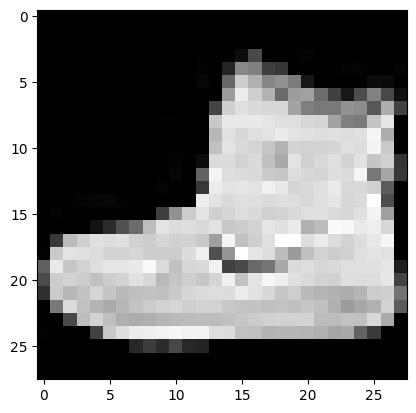

In [49]:
plt.imshow(image.squeeze(),cmap="gray")

In [50]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [51]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [52]:
loss_fn=nn.CrossEntropyLoss()
opimtizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [53]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [54]:
#training the CNN model
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2=timer()
epcohs=3

for epoch in tqdm(range(epcohs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=opimtizer,accuracy_fn=accuracy_fn,device=device)
  test_step(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
train_time_end_model_2=timer()

total_train_time_model_2=print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.58619,Train acc: 78.66

Train loss: 0.45503 | Test loss: 0.39189, Test acc: 86.11%

Epoch: 1
----
Train loss: 0.36158,Train acc: 86.95

Train loss: 0.45503 | Test loss: 0.34603, Test acc: 87.19%

Epoch: 2
----
Train loss: 0.32348,Train acc: 88.21

Train loss: 0.45503 | Test loss: 0.32984, Test acc: 88.18%

Train time on cuda : 34.207 seconds


In [55]:
model_2_results=eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
model_2_results

{'model_name': 'FashionMNistModelV2',
 'model_loss': 0.3298364579677582,
 'model_acc': 88.17891373801918}

In [56]:
model_0_results

{'model_name': 'FashionMNistModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [57]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNistModelV0,0.476639,83.426518
1,FashionMNistModelV1,0.685001,75.019968
2,FashionMNistModelV2,0.329836,88.178914


In [58]:
compare_results["training_time"]=[total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]

In [59]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNistModelV0,0.476639,83.426518,31.245355
1,FashionMNistModelV1,0.685001,75.019968,31.161499
2,FashionMNistModelV2,0.329836,88.178914,34.207356


Text(0, 0.5, 'model')

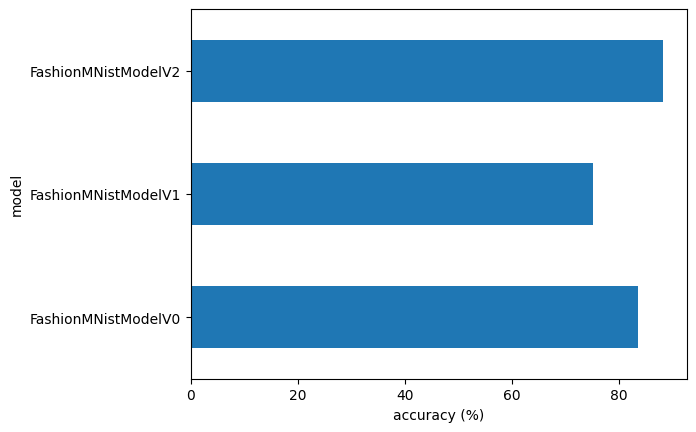

In [60]:
#visualise our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [68]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass (model outputs raw logits)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      #get pred_prob off GPU because matplotlib needs CPU
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [76]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

Text(0.5, 1.0, 'Ankle boot')

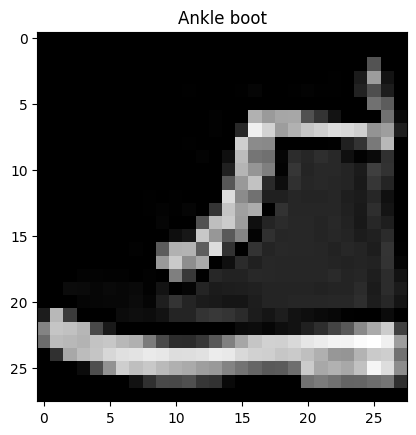

In [77]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [78]:
#Make predictions
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[1.1813e-05, 3.5160e-06, 1.0434e-05, 1.0364e-04, 5.5780e-06, 1.2391e-02,
         2.8252e-06, 6.8669e-03, 1.4633e-02, 9.6597e-01],
        [7.8587e-05, 4.1461e-06, 5.6463e-05, 3.3129e-06, 4.5862e-06, 8.1371e-04,
         9.9115e-07, 9.7451e-01, 4.6509e-04, 2.4066e-02]])

In [79]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

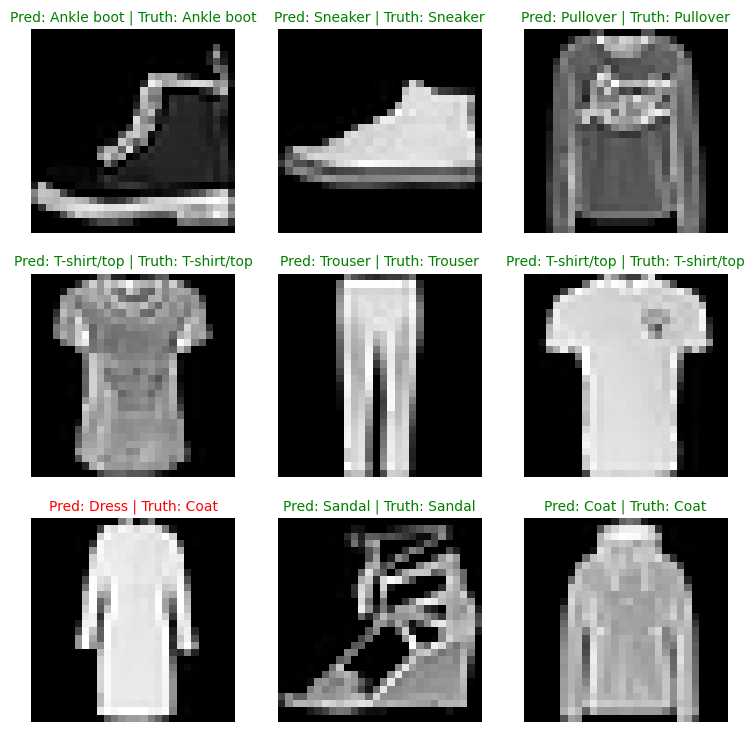

In [80]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label=class_names[pred_classes[i]]
  truth_label=class_names[test_labels[i]]
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

In [81]:
import mlxtend

In [82]:
mlxtend.__version__

'0.22.0'

In [85]:
from tqdm.auto import tqdm

#1.Make predictions on trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions...."):
    X,y=X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor=torch.concat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [90]:
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19,"mlextend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 11.6 MB/s eta 0:00:00
mlxtend version: 0.22.0


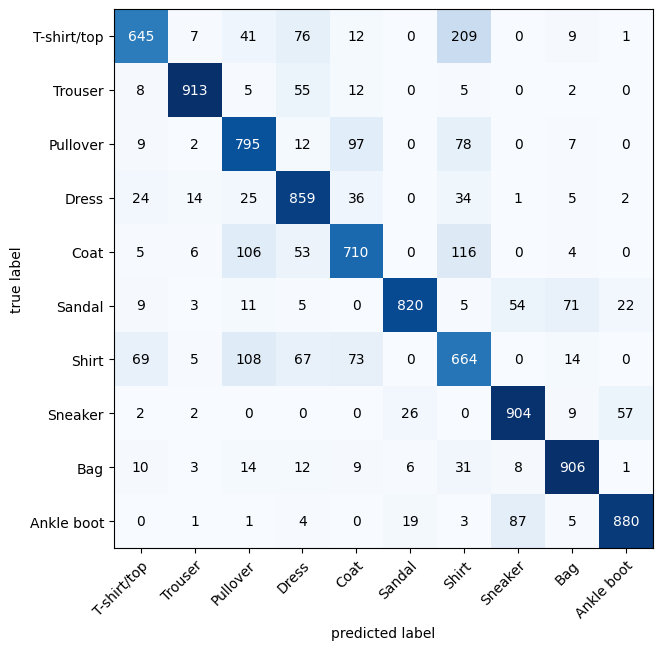

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2.Setting up confusion instance and compare predictions to target
confmat=ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)

#3.plot the confusion matrix
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),#for matplotlib we need numpy
    class_names=class_names,
    figsize=(10,7)
)

In [95]:
#Save and loading best performing model
from pathlib import Path
#create model dictory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_pytorch_computer_vision_model_2.pth')

In [96]:
#Save Model dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [97]:
#create a new instance
torch.manual_seed(42)
loaded_model_2=FashionMNistModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [99]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(model=loaded_model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNistModelV2',
 'model_loss': 0.3298364579677582,
 'model_acc': 88.17891373801918}

In [100]:
model_2_results

{'model_name': 'FashionMNistModelV2',
 'model_loss': 0.3298364579677582,
 'model_acc': 88.17891373801918}